## Q1: Fun with arrays

**A.**  Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.


**B.** Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

# Q1

In [1]:
import numpy as np

In [2]:
a = np.arange(1, 16).reshape(3,5).T
a

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [3]:
b = np.concatenate((a[1,:], a[3,:]))

In [4]:
ncols = 5
nrows = 4

In [5]:
c = np.zeros(ncols*nrows).reshape(4,5)
c

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
c[0] = 1
c[-1] = 1
c[:,0] = 1
c[:, -1] = 1
c

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [7]:
import time
from matplotlib import pyplot as plt

In [8]:
def mean(a):
    s = 0.
    for el in a:
        s += el
    return s/a.size

def std_dev(a):
    s_square = 0.
    m = mean(a)
    for el in a:
        s_square += (el - m)**2
    
    return(s_square/a.size)**(1./2.)

t0 = time.time()
a = np.arange(15)
print(std_dev(a))
t1 = time.time()
print("my time: {} s".format(t1-t0))   

t0 = time.time()
a = np.arange(15)
print(np.std(a))
t1 = time.time()
print("numpy time: {} s".format(t1-t0)) 

4.320493798938574
my time: 0.0010600090026855469 s
4.320493798938574
numpy time: 0.00019884109497070312 s


In [9]:
dim = 800
x = np.arange(1, dim)
my_dev, np_dev, my_time, np_time = np.zeros((4, dim))


for i in range(1, dim):
    a = np.arange(i)
    t0 = time.time()
    my_dev[i-1] = std_dev(a)
    t1 = time.time()
    my_time[i-1] = t1-t0
    t0 = time.time()
    np_dev[i-1] = np.std(a)
    t1 = time.time()
    np_time[i-1] = t1 - t0

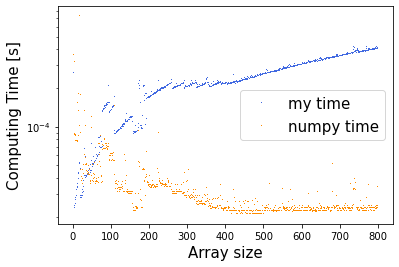

In [10]:
plt.plot(x, my_time[:-1], ls='', marker=',', color='royalblue', label='my time')
plt.plot(x, np_time[:-1], color='darkorange', ls='', marker=',', label='numpy time')
#print(np_time)
plt.xlabel('Array size', fontsize=15)
plt.ylabel('Computing Time [s]', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)